# Customer Satisfaction Analysis: 

In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
ds = pd.read_csv('E-commerce_NPA_Dataset.csv', index_col='CustomerID')
ds.head()

,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
CustomerID,,,,,,,,,,,
1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [25]:
ds.shape

(500, 12)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     500 non-null    int64  
 1   Gender                  500 non-null    object 
 2   PurchaseAmount          500 non-null    float64
 3   PurchaseFrequency       500 non-null    int64  
 4   ProductQualityRating    500 non-null    int64  
 5   DeliveryTimeRating      500 non-null    int64  
 6   CustomerServiceRating   500 non-null    int64  
 7   WebsiteEaseOfUseRating  500 non-null    int64  
 8   ReturnRate              500 non-null    float64
 9   DiscountUsage           500 non-null    float64
 10  LoyaltyProgramMember    500 non-null    object 
dtypes: float64(3), int64(6), object(2)
memory usage: 46.9+ KB


In [10]:
ds.describe()

,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


### Key observations: 
* Age: Customers average 44 years old, ranging from 18 to 69.

* Purchase Amount: The average spend is $1,065, with high variability.

* Purchase Frequency: Customers buy 14 times on average, with some making up to 29 purchases.

* Ratings: Product and service ratings average 3 out of 5, indicating moderate satisfaction.

* Return Rate: The average return rate is 25%, peaking at 50% for some.

* Discount Usage: Customers use an average of $251 in discounts, with considerable variation.

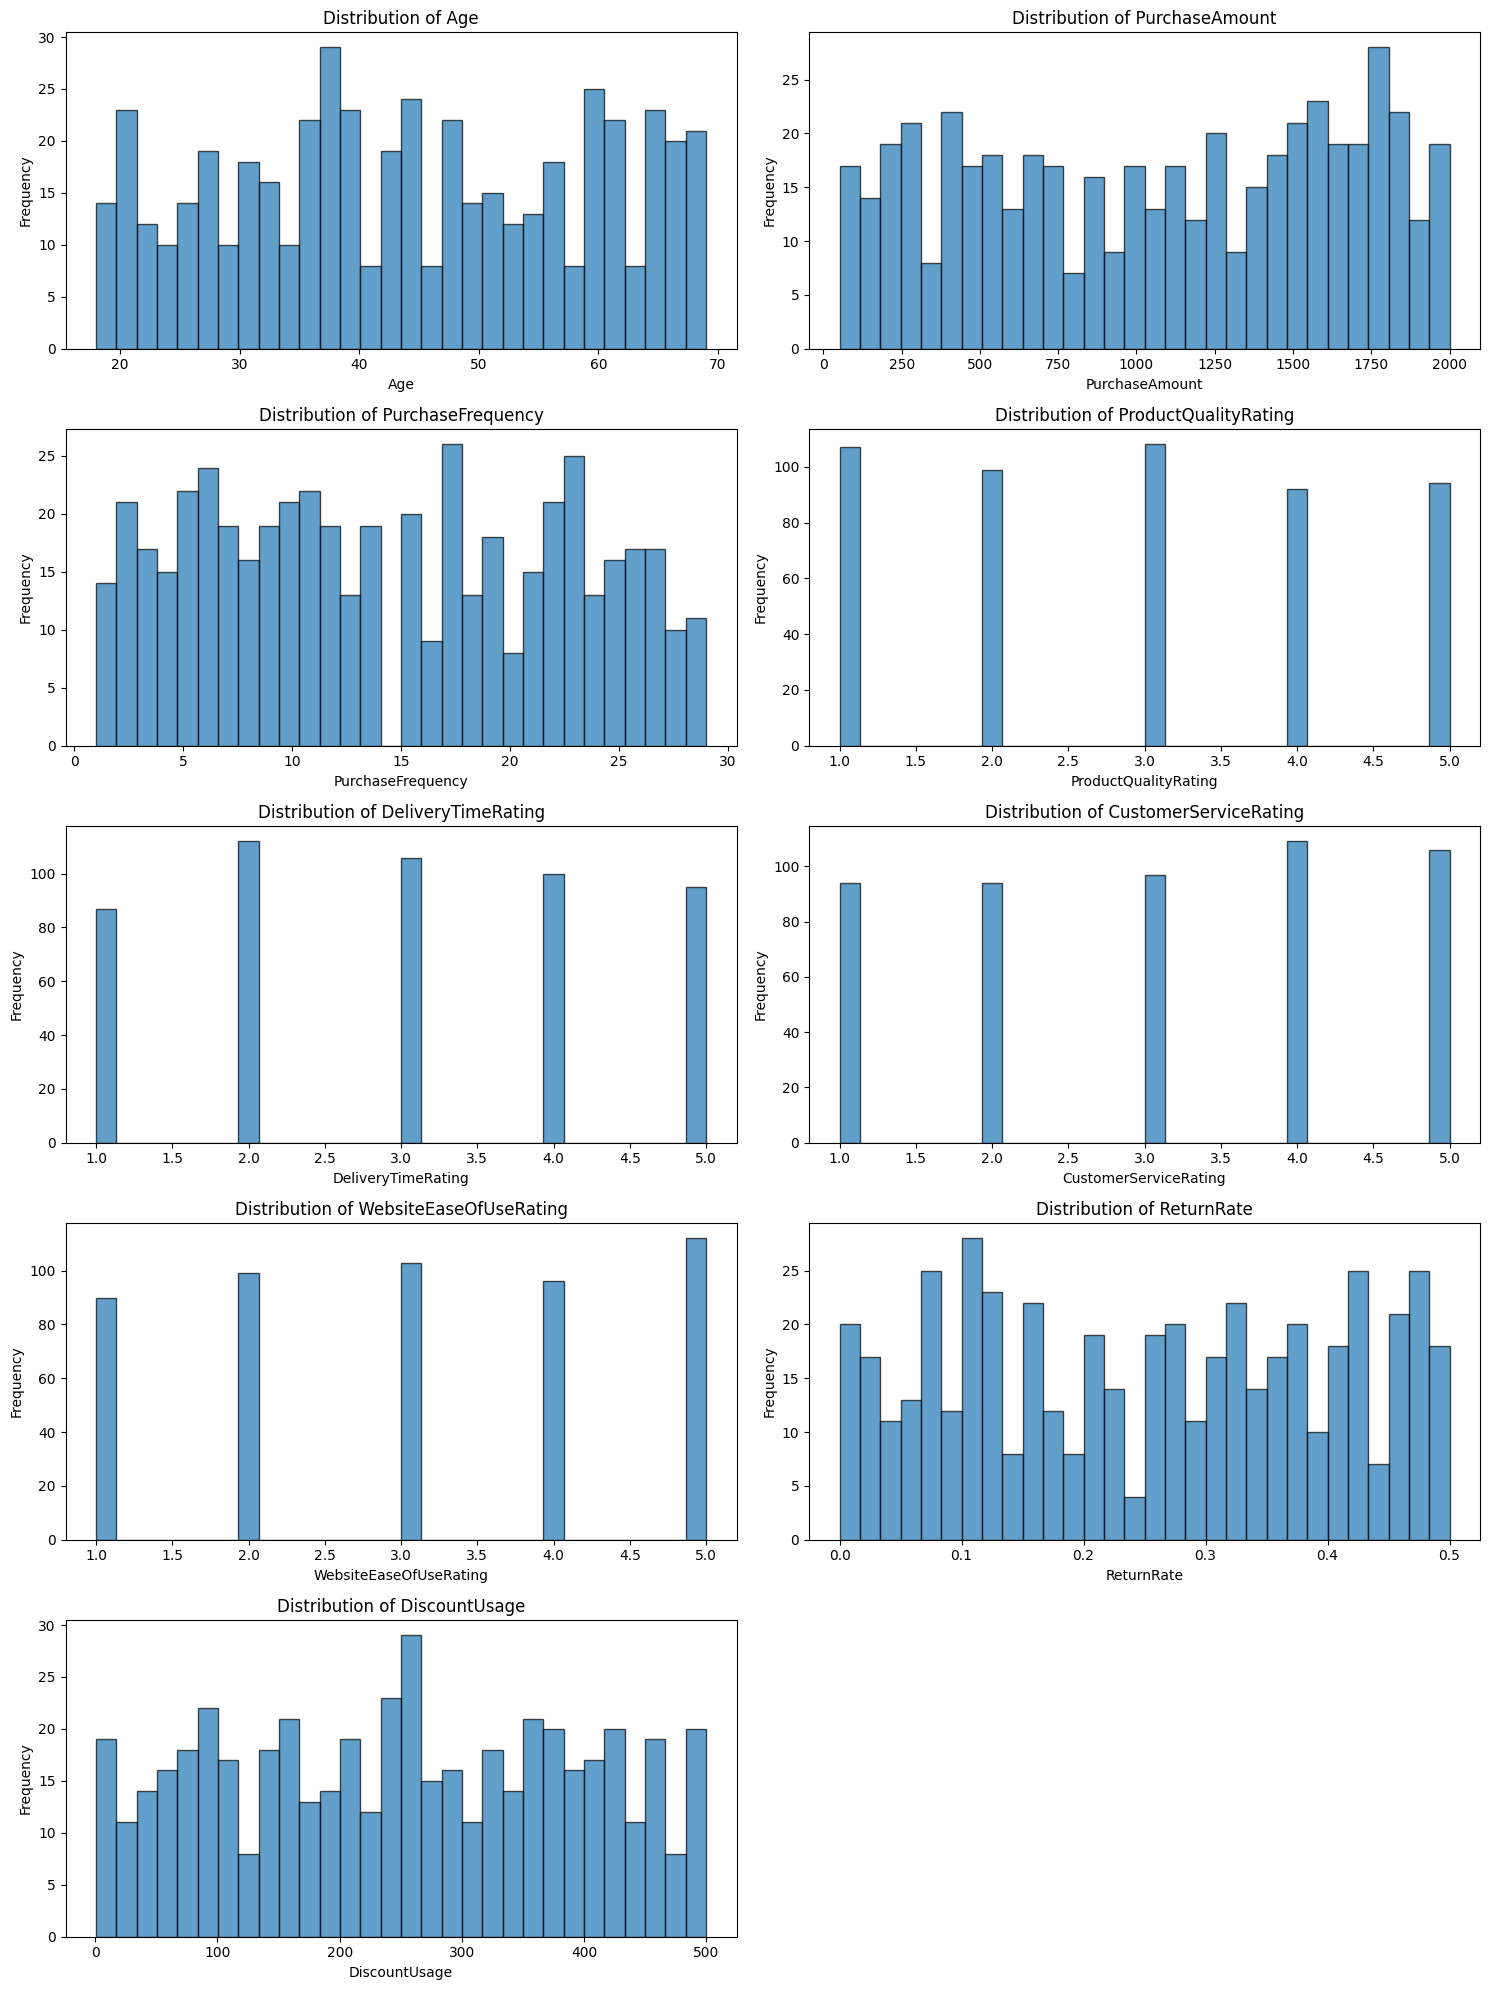

In [14]:
# Visualising the distributions of these variables
numeric_col = [
              'Age', 'PurchaseAmount', 'PurchaseFrequency', 
              'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 
              'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_col, 1):
    plt.subplot(5,2,i)
    plt.hist(ds[col], bins=30, edgecolor = 'k', alpha= 0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [21]:
# Segmenting the customers based on demographic and behavioral factors and analyse their satisfaction ratings

# create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']

ds['AgeGroup'] = pd.cut(ds['Age'], bins=bins, labels=labels, right=False)

# select only the numeric rating columns 
purchase_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculating mean ratings by age group and gender
mean_ratings_age_gender = ds.groupby(['AgeGroup', 'Gender'],observed=True)[purchase_columns].mean()
mean_ratings_age_gender.reset_index(inplace=True)
mean_ratings_age_gender

,AgeGroup,Gender,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating
0,18-29,Female,3.052632,3.210526,3.175439,2.912281
1,18-29,Male,2.933333,3.000000,3.333333,3.355556
2,30-39,Female,2.929825,2.859649,2.912281,3.070175
3,30-39,Male,3.080000,2.820000,2.980000,2.880000
4,40-49,Female,3.090909,2.890909,3.036364,3.109091
5,40-49,Male,2.857143,3.166667,3.142857,3.142857
6,50-59,Female,2.945946,2.945946,3.027027,3.162162
7,50-59,Male,2.833333,2.895833,3.312500,3.062500
8,60-69,Female,2.900000,3.300000,3.066667,2.950000
9,60-69,Male,2.673469,2.938776,2.836735,3.285714


### Key observations:
* Product Quality: Higher ratings from customers aged 18-29.

* Gender Differences: Women aged 40-49 give the highest overall ratings; men aged 60-69 give the lowest.

* Delivery Time: Satisfaction is steady, with the highest from women aged 60-69 and the lowest from men aged 30-39.

* Customer Service: Consistent ratings, with a slight peak among younger men (18-29) and the lowest from men aged 60-69.

In [23]:
# selecting only the numeric columns 
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculating mean ratings by loyalty program membership
mean_ratings_loyalty = ds.groupby('LoyaltyProgramMember')[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_loyalty.reset_index(inplace=True)
mean_ratings_loyalty

,LoyaltyProgramMember,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
0,No,2.920502,2.916318,2.987448,3.108787,0.251883,241.426710
1,Yes,2.946360,3.091954,3.160920,3.057471,0.252644,260.113108


In [27]:
# calculating Net Promoter Score

ds['NPS_Category'] = pd.cut(ds['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = ds['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']

nps_counts

NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64

An NPS of -100 signals extremely low customer satisfaction, highlighting an urgent need to improve customer service and turn detractors into promoters.

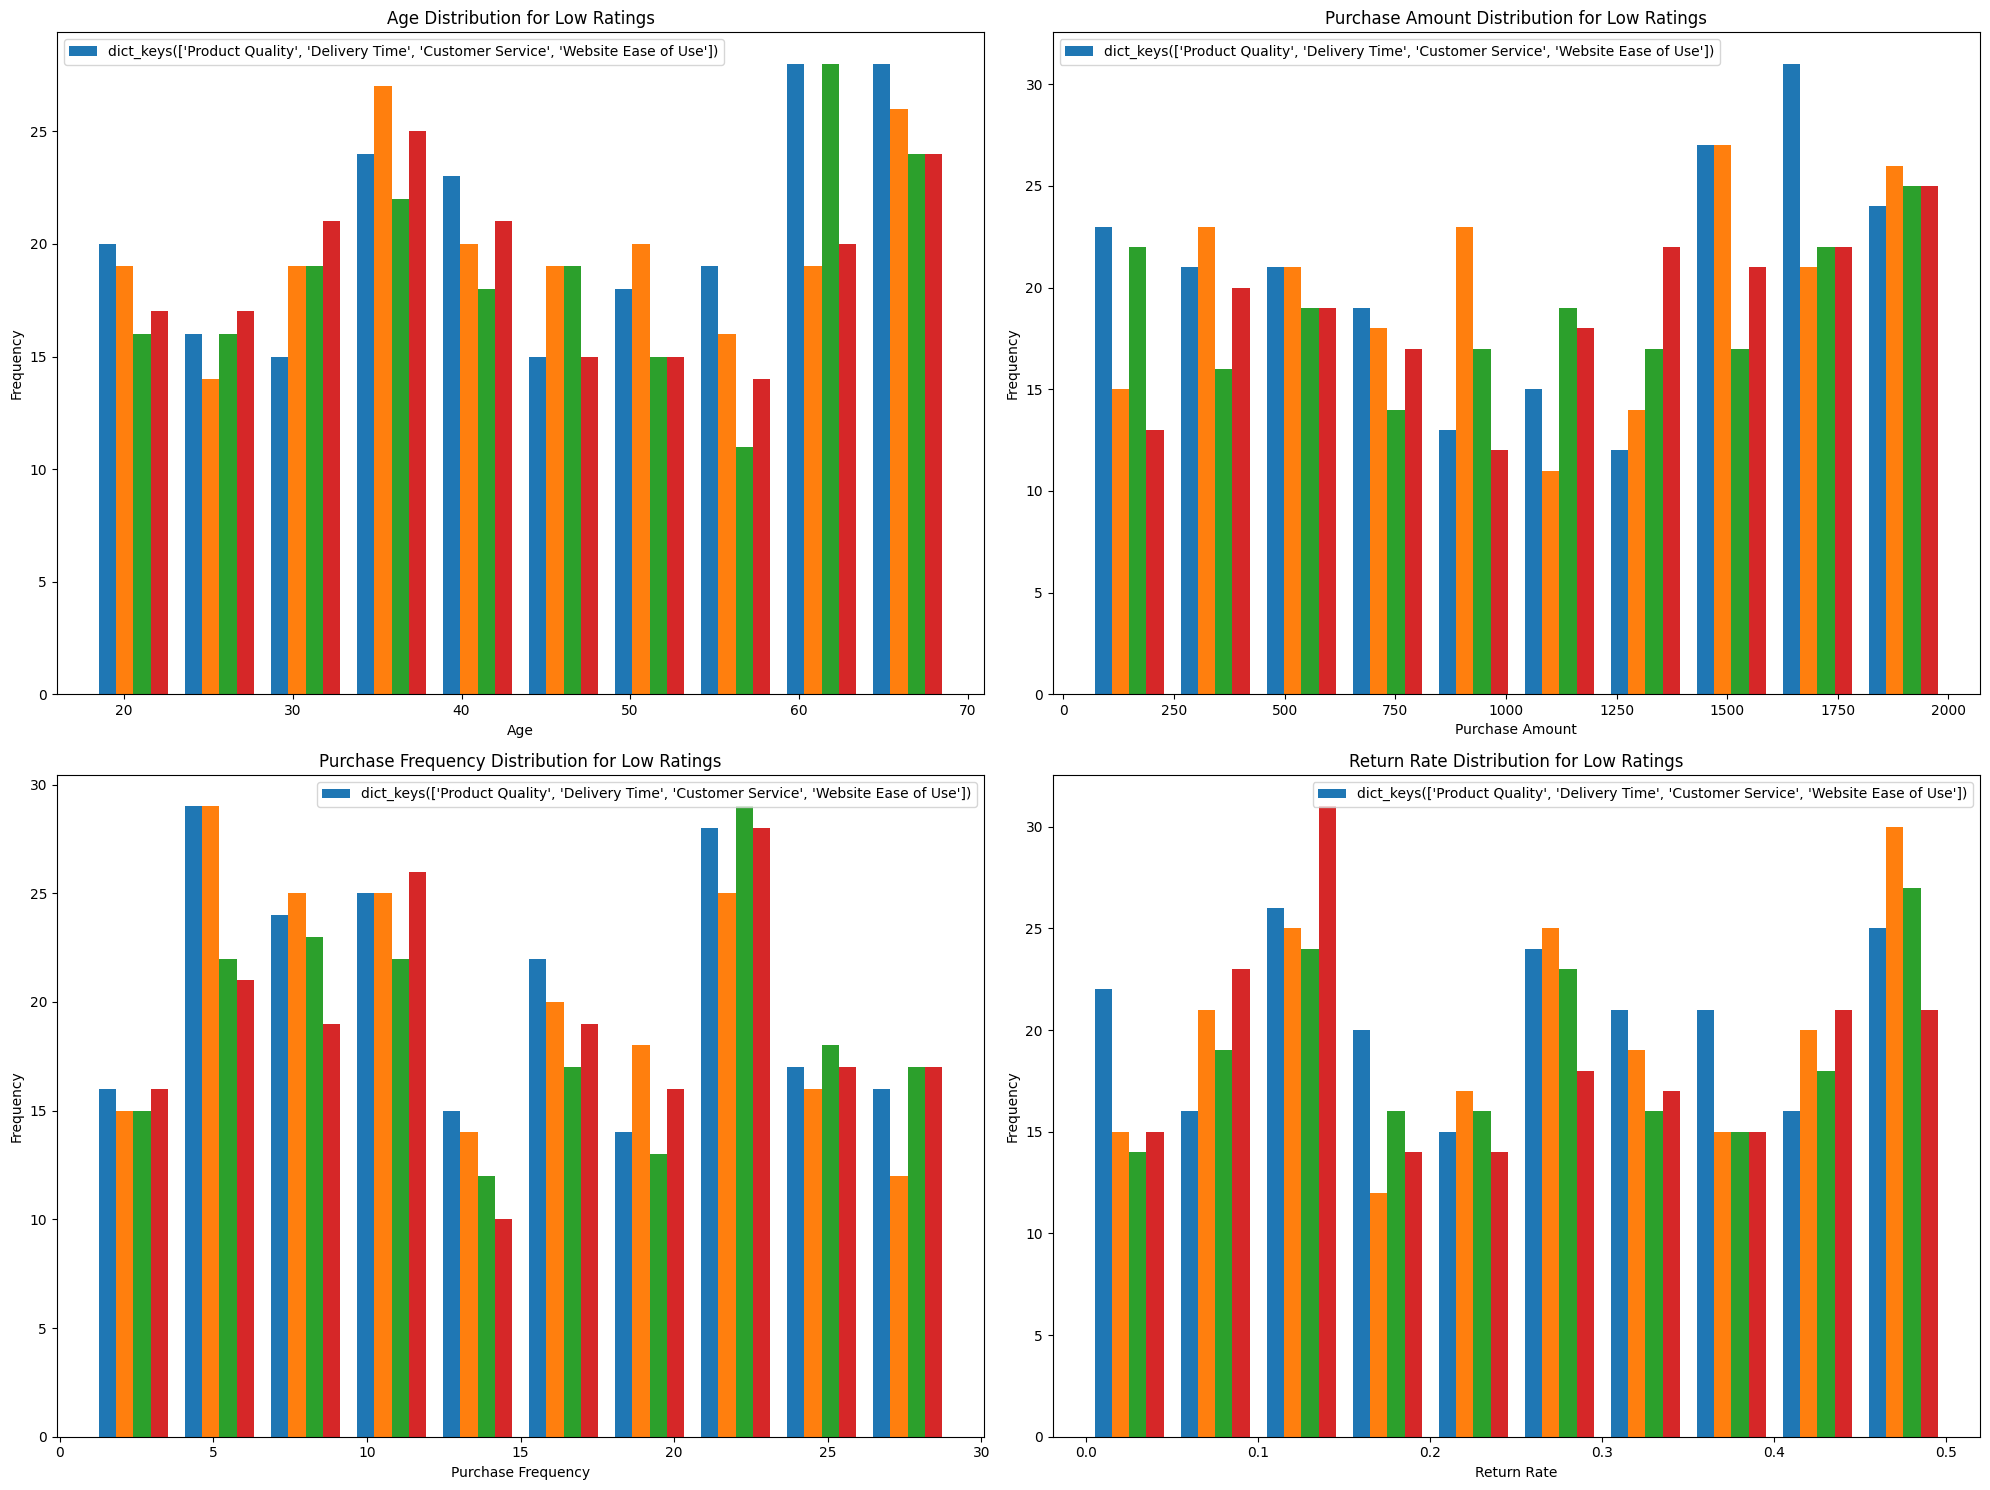

In [28]:
# Analysing low ratings by identifying the customers who gave them and examining their characteristics.

# Define low rating threshold
# Define low rating threshold
low_rating_threshold = 2

# Define characteristics and their corresponding titles and labels
characteristics = {
    'Age': 'Age Distribution for Low Ratings',
    'PurchaseAmount': 'Purchase Amount Distribution for Low Ratings',
    'PurchaseFrequency': 'Purchase Frequency Distribution for Low Ratings',
    'ReturnRate': 'Return Rate Distribution for Low Ratings'
}

# Create a dictionary for low ratings in different aspects
low_ratings = {
    'Product Quality': ds[ds['ProductQualityRating'] <= low_rating_threshold],
    'Delivery Time': ds[ds['DeliveryTimeRating'] <= low_rating_threshold],
    'Customer Service': ds[ds['CustomerServiceRating'] <= low_rating_threshold],
    'Website Ease of Use': ds[ds['WebsiteEaseOfUseRating'] <= low_rating_threshold]
}

# Plot the characteristics for each low rating subset
plt.figure(figsize=(20, 15))

for i, (characteristic, title) in enumerate(characteristics.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(
        [subset[characteristic] for subset in low_ratings.values()],
        bins=10, label=low_ratings.keys()
    )
    plt.title(title)
    plt.xlabel(characteristic.replace('PurchaseAmount', 'Purchase Amount')
                          .replace('PurchaseFrequency', 'Purchase Frequency')
                          .replace('ReturnRate', 'Return Rate'))
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()